In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov5-SI-seg
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/yolov5-SI-seg
benchmarks.py	 hubconf.py	   setup.cfg	   yolov5m.pt
classify	 LICENSE	   si.yaml	   yolov5m-seg.pt
CONTRIBUTING.md  models		   train.py	   yolov5-SI-seg.ipynb
data		 __pycache__	   tutorial.ipynb  yolov5x.pt
datasets	 README.md	   utils
detect.py	 requirements.txt  val.py
export.py	 segment	   yolov5.ipynb


In [2]:
%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.6 MB/s eta 0:00:00
Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


In [3]:
!python segment/train.py --img 416 --batch 16 --epochs 300 --patience 0 --data si.yaml --weights yolov5m-seg.pt --cache 

segment/train: weights=yolov5m-seg.pt, cfg=, data=si.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v6.2-217-ga625f29 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

remote: Enumerating objects: 2330, done.
remote: Counting objects: 100% (912/912), done.
hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [4]:
!python segment/predict.py --weights runs/train-seg/exp/weights/best.pt --img 416 --conf 0.5 --source test/images

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v6.2-217-ga625f299 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 220 layers, 21652358 parameters, 0 gradients, 69.8 GFLOPs
image 1/2 /content/gdrive/MyDrive/yolov5-SI-seg/test/images/test1.jpg: 256x416 3 Instruments, 18.0ms
image 2/2 /content/gdrive/MyDrive/yolov5-SI-seg/test/images/test2.jpg: 256x416 2 Instruments, 16.1ms
Speed: 0.4ms pre-process, 17.0ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/p

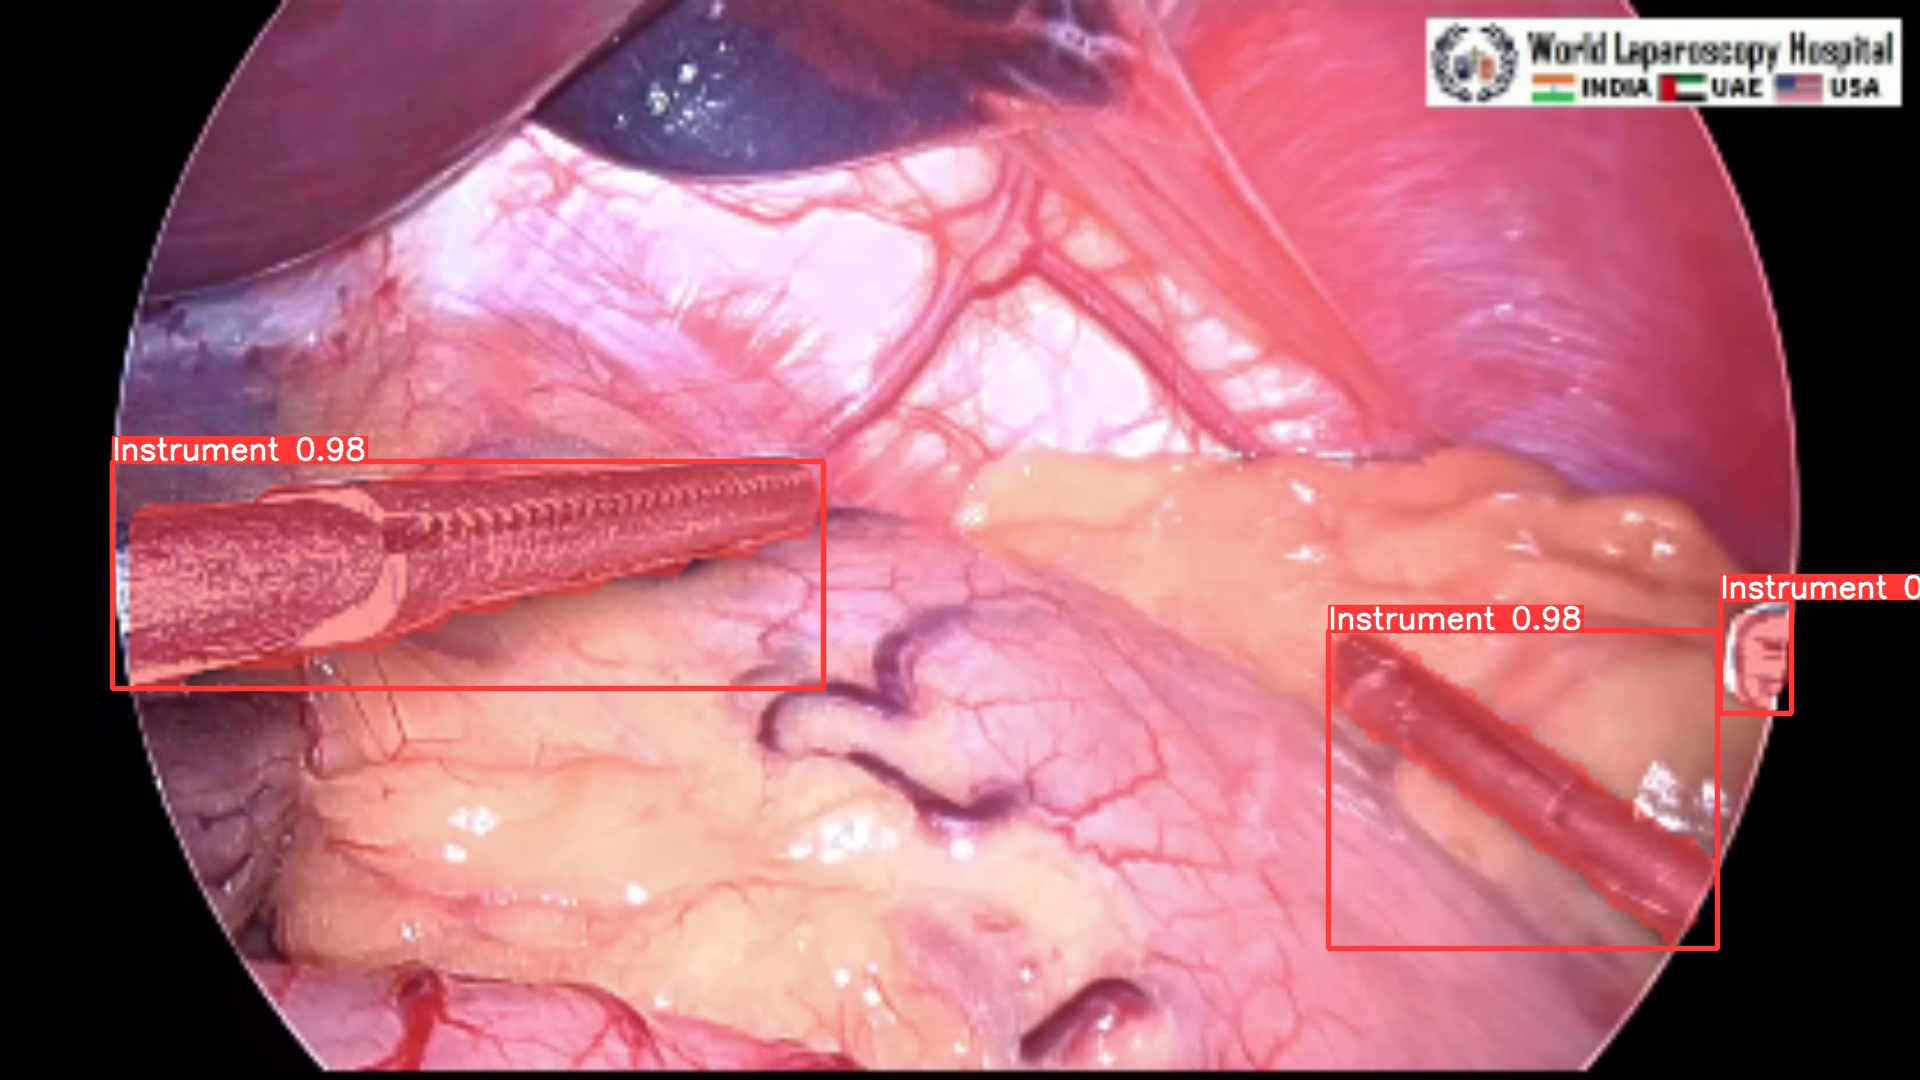

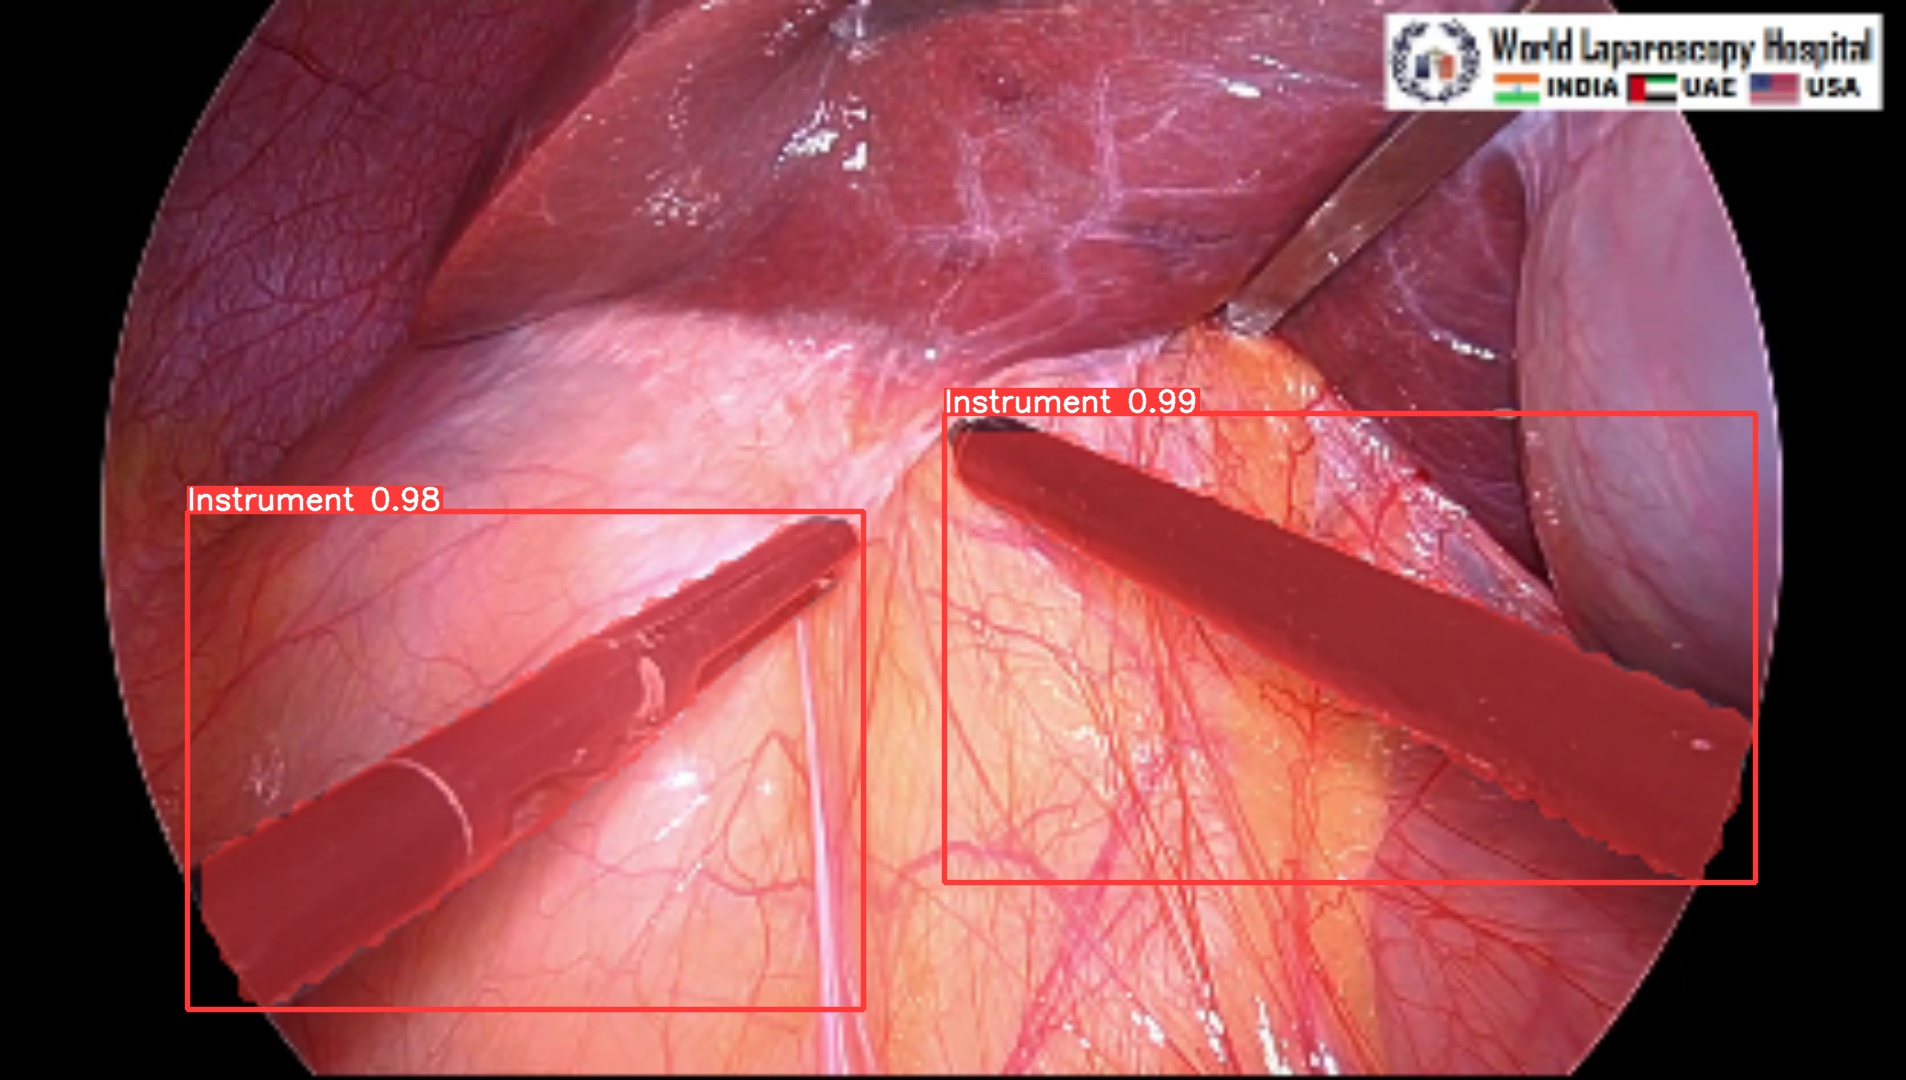

In [5]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/predict-seg/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")